# Upload Data

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
data.grade.dtypes

dtype('int64')

In [6]:
data.shape

(21597, 21)

In [9]:
data.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [10]:
data.yr_built.describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [11]:
data.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [12]:
data.sqft_lot.describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

## Grade

### Seeing if grade is related to price

In [6]:
grade = data[data.grade.isin([3, 13])] 

In [7]:
grade[['price', 'grade']].sort_values(by = 'price')

,price,grade
3220,262000.0,3
5446,1780000.0,13
13687,2340000.0,13
6035,2390000.0,13
13398,2420000.0,13
4807,2480000.0,13
14542,2890000.0,13
10362,2980000.0,13
7900,3200000.0,13
7028,3800000.0,13


Yes, it does seem to be. The most expensive house is $7,700,000. Let me double check.

In [8]:
data.sort_values(by = 'price').tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


Yes, but note how the second most expensive house is grade 11.

From the the website: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g  
**Grade** - Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.) 

Maybe I should figure out what grade means and see how it's correlated to price. But I can't find much more info. 
(Note: I did find a pdf. See notes)

-----

I'd like to see how many buckets there are per grade

In [9]:
data.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Most are in the 7,8,9 area.

## Waterfront

In [10]:
data.waterfront.nunique()

2

It seems waterfront is categorical, either 0 ,1 or nan. Let's see how many there are.


In [11]:
waterf = data.waterfront.tolist()
len(waterf)

21597

In [12]:
waterf_dict = {'waterfront': 0, 'landlocked': 0, 'nan': 0}
waterf_dict

{'waterfront': 0, 'landlocked': 0, 'nan': 0}

In [13]:
for x in waterf:
    if x == 0.0:
        waterf_dict['landlocked'] += 1
    elif x == 1.0:
        waterf_dict['waterfront'] += 1
    else:
        waterf_dict['nan'] += 1
waterf_dict

{'waterfront': 146, 'landlocked': 19075, 'nan': 2376}

In [14]:
len(waterf)

21597

In [15]:
print(2376/21597)
146+19075+2376

0.11001527989998611


21597

Note that 11% of the the listings don't know if it's waterfront or not - NaN

## View

Not sure what "view" means. In the glossary, it's "has been viewed", but the value_counts are integers 0 - 4

In [16]:
data.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

## Price

Let's do a histogram of price.

In [17]:
price = data.price.tolist()

In [18]:
price.sort()
price[0:10]

[78000.0,
 80000.0,
 81000.0,
 82000.0,
 82500.0,
 83000.0,
 84000.0,
 85000.0,
 85000.0,
 86500.0]

C:\Users\halpe\.conda\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


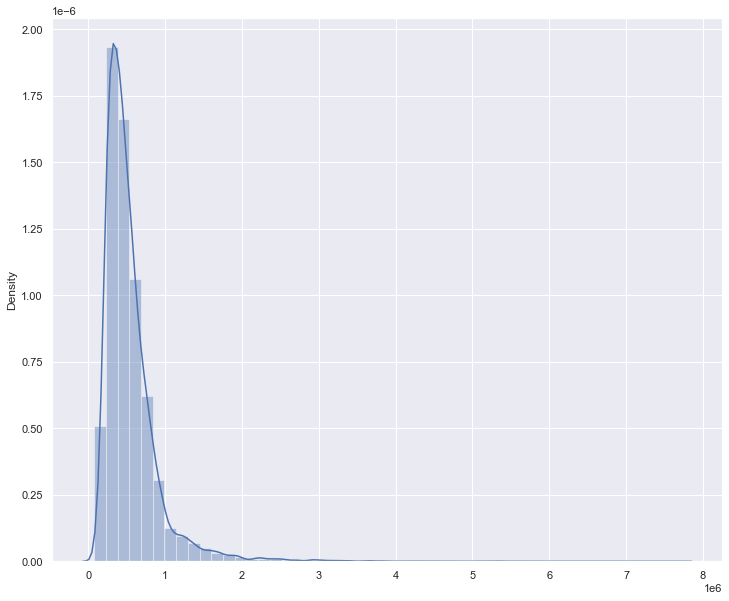

In [19]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(price)

In [20]:
under_100_thou =  sum(1 for i in price if i < 100000)
under_100_thou

24

24 are under $100K

In [21]:
sum(1 for i in price if i >= 100000 and i < 200000)

759

759 are between "$100,000" and "$200000"

In [22]:
sum(1 for i in price if i >= 200000 and i < 300000)

3645

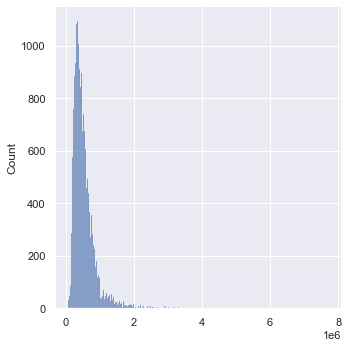

In [23]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.displot(data=data, x=price)

In [24]:
len(price)

21597

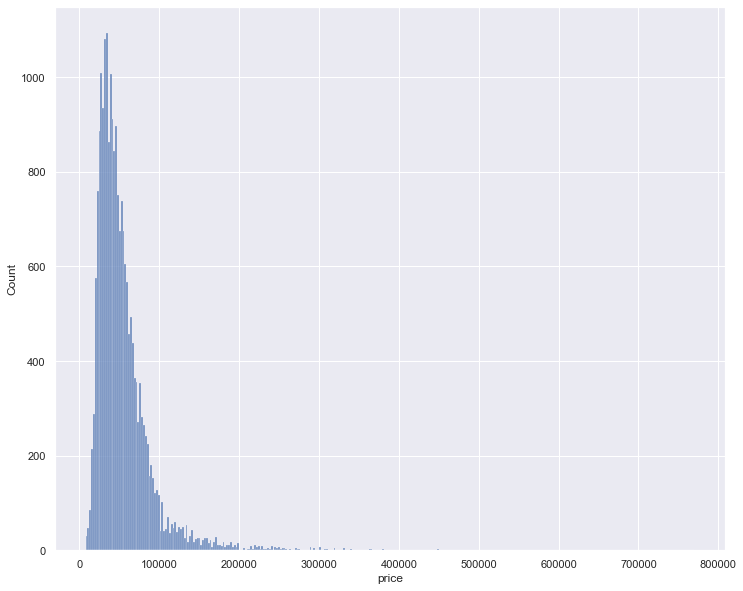

In [25]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.histplot(data['price']/10)

In [26]:
len(price)

21597

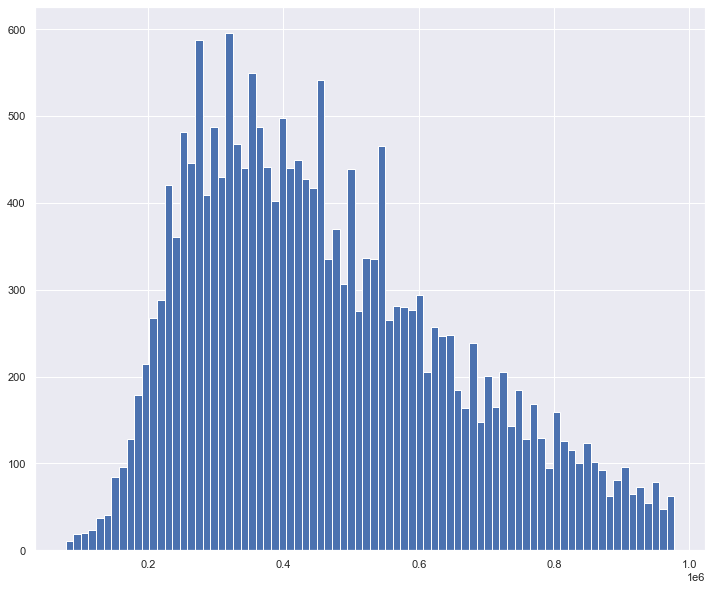

In [27]:
lower_prices = price[0:20000]
# fig = plt.figure(figsize=[15,8])
plt.hist(lower_prices, bins=80) #fig=fig
plt.show()

I see the problem. The dataset is being messed up by a few outiers of multimillion dollar houses. I'm going to try limiting the set to under $250,000

In [28]:
under_two_five = (data[data['price'] < 250000])
under_two_five = under_two_five['price']
under_two_five

0        221900.0
2        180000.0
8        229500.0
18       189000.0
19       230000.0
           ...   
21435    239950.0
21454    249000.0
21534    249000.0
21556    230000.0
21586    224000.0
Name: price, Length: 2297, dtype: float64

Let's try to make a histplot of under $250k 

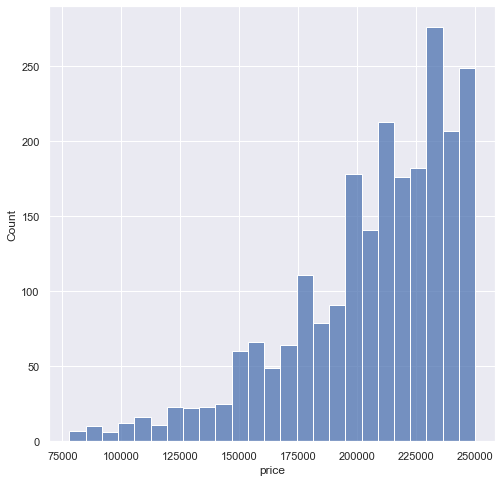

In [29]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,8)})
sns.histplot(under_two_five)

Let me go a bit higher.

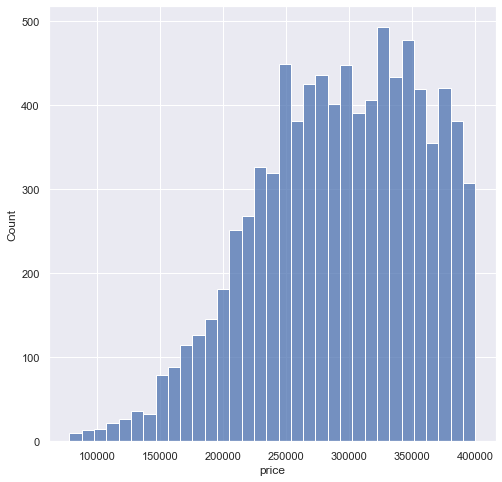

In [30]:
under_4k = (data[data['price'] < 400000])
under_4k = under_4k['price']
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,8)})
sns.histplot(under_4k)

Up to a million

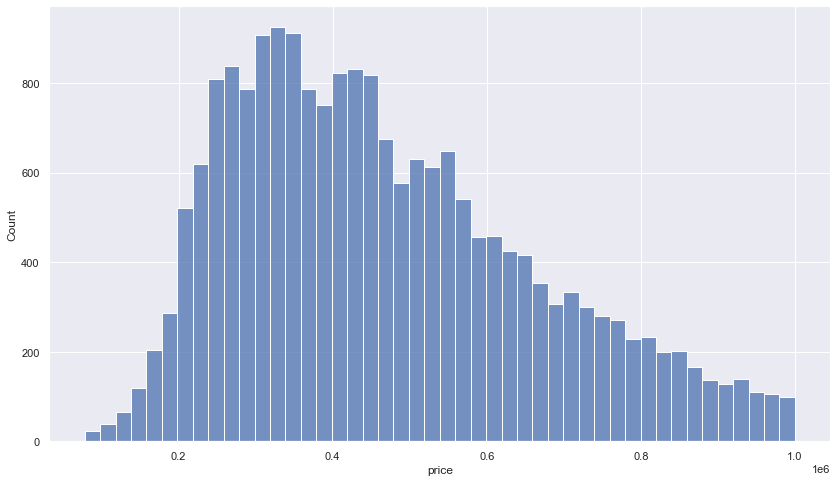

In [31]:
under_1m = (data[data['price'] < 1000000])
under_1m = under_1m['price']
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(14,8)})
sns.histplot(under_1m)

That's better. Let's see how many houses are under 1 million

In [32]:
round(len(under_1m)/data.shape[0]*100, 1)

93.1

93% of houses are under $1 million dollars

# More exploration

## How many zip codes?

In [33]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [34]:
data.zipcode.nunique()

70

## What is the date range?

In [35]:
data.date.dtypes

dtype('O')

It's a string. It would be tedious to get it into a number, right? let's try something

In [36]:
data.date[0]

'10/13/2014'

In [37]:
int(data.date[0][-4:])

2014

In [38]:
dates = data.date.to_list()

In [39]:
dates = [int(str[-4:]) for str in dates]

In [40]:
max(dates)

2015

In [41]:
min(dates)

2014

All dates are between 2014 and 2015. Not that interesting to use.

## Year renovated/built

In [42]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [43]:
data.yr_renovated.dtype

dtype('float64')

In [44]:
data.yr_renovated[0:10]

0       0.0
1    1991.0
2       NaN
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
Name: yr_renovated, dtype: float64

In [45]:
data.yr_built

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64

For the year renovated, it seems that there are zeros if it has never been renovated. All the year builts seem to have dates

Let me check on the year builts first

In [46]:
data.yr_built.dtype

dtype('int64')

In [47]:
yr_built = data.yr_built.to_list()

In [48]:
min(yr_built)

1900

In [49]:
max(yr_built)

2015

In [50]:
yr_built.count(1900)

87

In [51]:
yr_built.count(1901)

29

In [52]:
yr_built.count(1903)

46

In [53]:
yr_built.count(2015)

38

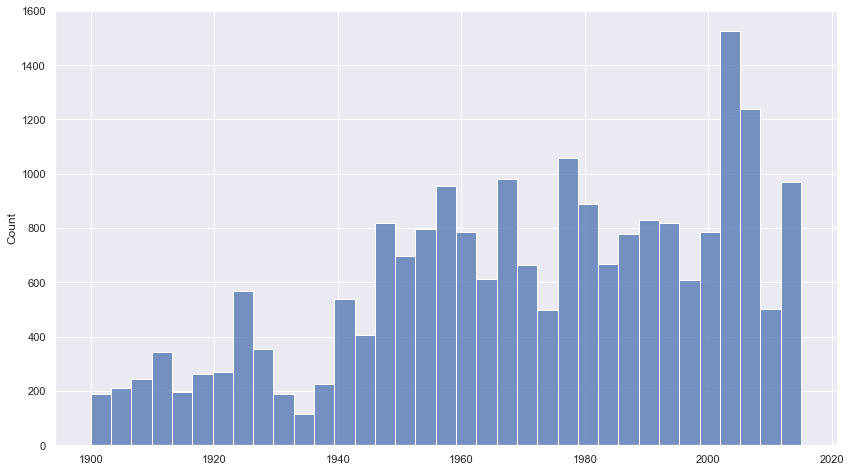

In [54]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(14,8)})
sns.histplot(yr_built)

In [55]:
yr_renov = data.yr_renovated.to_list()

In [56]:
yr_renov.count(0)

17011

In [57]:
yr_renov = data.yr_renovated.dropna().to_list()

In [58]:
len(yr_renov)

17755

In [59]:
round(1 - len(yr_renov)/data.shape[0], 3)*100

17.8

17.9% of the renovated data were NaN

In [60]:
from collections import Counter
Counter(yr_renov)

Counter({0.0: 17011,
         1991.0: 16,
         2002.0: 17,
         2010.0: 15,
         1992.0: 13,
         2013.0: 31,
         1994.0: 14,
         1978.0: 3,
         2005.0: 29,
         2003.0: 31,
         1984.0: 16,
         1954.0: 1,
         2014.0: 73,
         2011.0: 9,
         1983.0: 15,
         1945.0: 3,
         1990.0: 22,
         1988.0: 11,
         1977.0: 7,
         1981.0: 4,
         1995.0: 12,
         2000.0: 29,
         1999.0: 15,
         1998.0: 16,
         1970.0: 9,
         1989.0: 20,
         2004.0: 22,
         1986.0: 14,
         2007.0: 30,
         1987.0: 14,
         2006.0: 20,
         1985.0: 14,
         2001.0: 15,
         1980.0: 8,
         1971.0: 1,
         1979.0: 7,
         1997.0: 12,
         1950.0: 1,
         1969.0: 4,
         1948.0: 1,
         2009.0: 21,
         2015.0: 14,
         1974.0: 2,
         2008.0: 15,
         1968.0: 7,
         2012.0: 8,
         1963.0: 4,
         1951.0: 1,
         1

In [61]:
len(yr_renov)

17755

17011 were never renovated.

In [62]:
round(100 - (17011/17755 * 100), 1)

4.2

Only 4.2% of houses were renovated. Actually even less because of all the NaN's I took out. Don't think it's that useful of a metric for anything.

# Poking around the data a little more

In [63]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [64]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [65]:
data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

## Bedrooms

In [66]:
data.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

## Grade

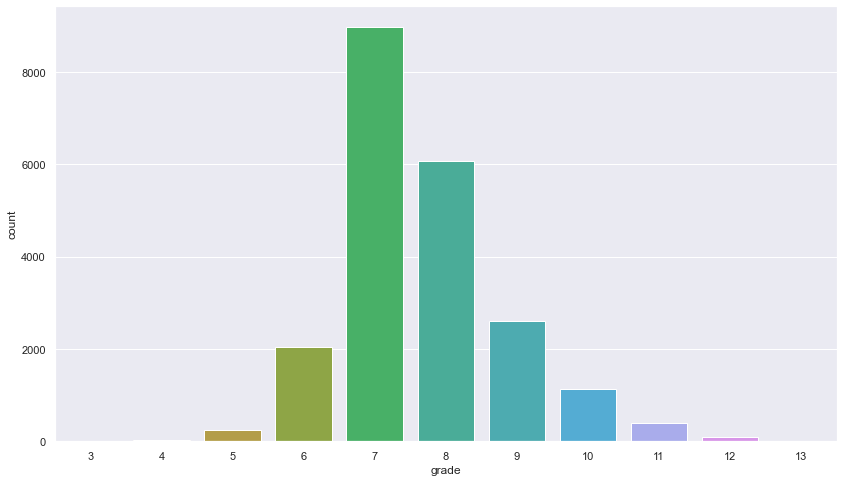

In [67]:
sns.countplot(x=data.grade)

## Yr. Built

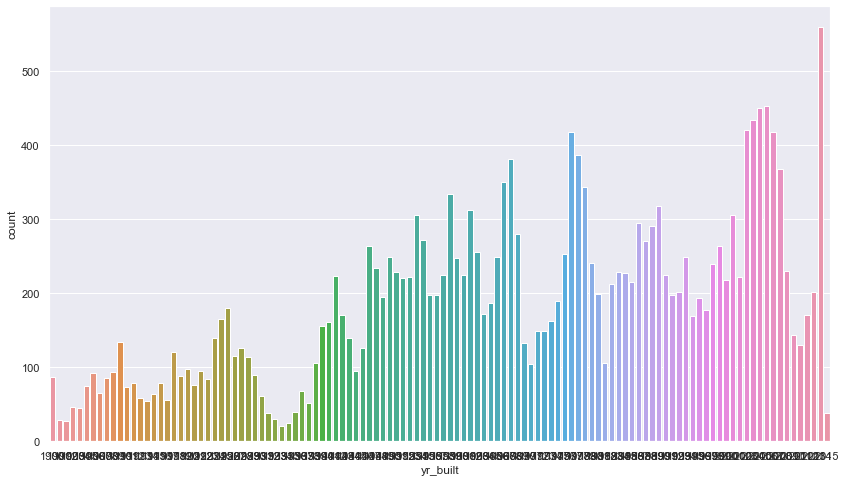

In [68]:
sns.countplot(x=data.yr_built)

In [69]:
data.yr_built.nunique()

116

In [70]:
min(data.yr_built)

1900

In [71]:
max(data.yr_built)

2015

## Some scatter plots

See the relation between year and grade

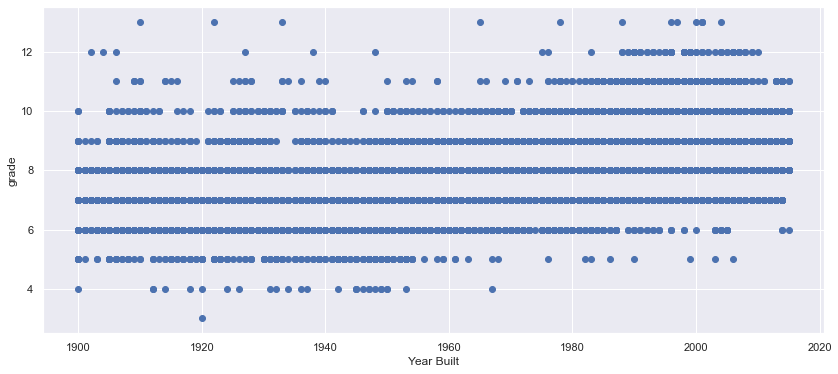

In [72]:
plt.figure(figsize=(14,6))
plt.scatter(data.yr_built, data.grade)
plt.xlabel("Year Built")
plt.ylabel("grade")
plt.show()

No relation between year and grade

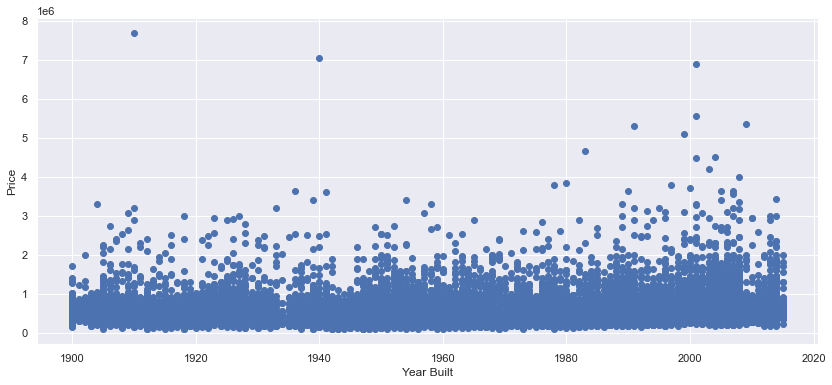

In [73]:
plt.figure(figsize=(14,6))
plt.scatter(data.yr_built, data.price)
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.show()

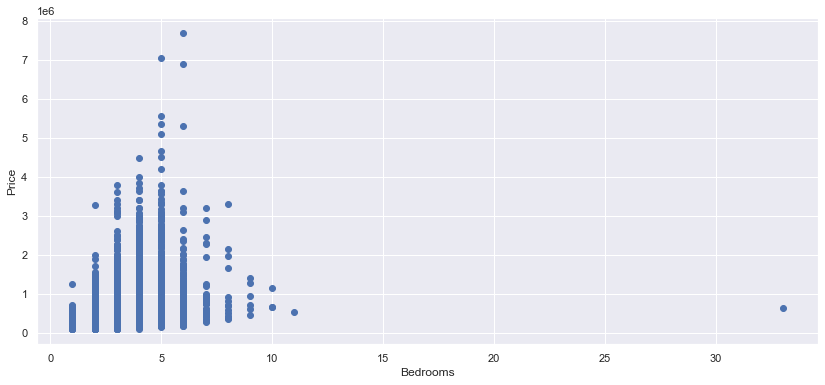

In [74]:
plt.figure(figsize=(14,6))
plt.scatter(data.bedrooms, data.price)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

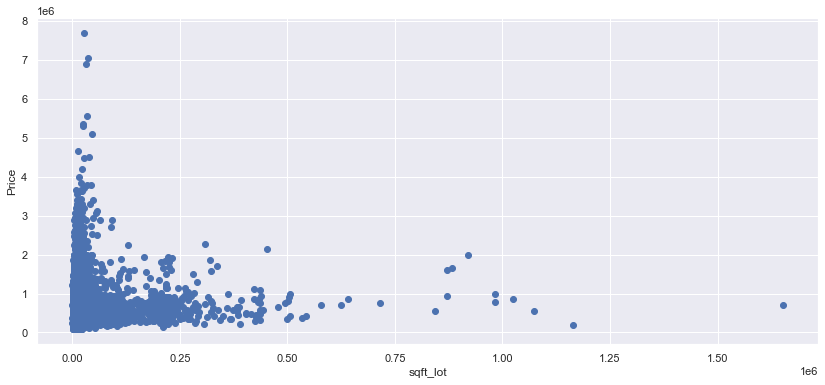

In [75]:
plt.figure(figsize=(14,6))
plt.scatter(data.sqft_lot, data.price)
plt.xlabel("sqft_lot")
plt.ylabel("Price")
plt.show()

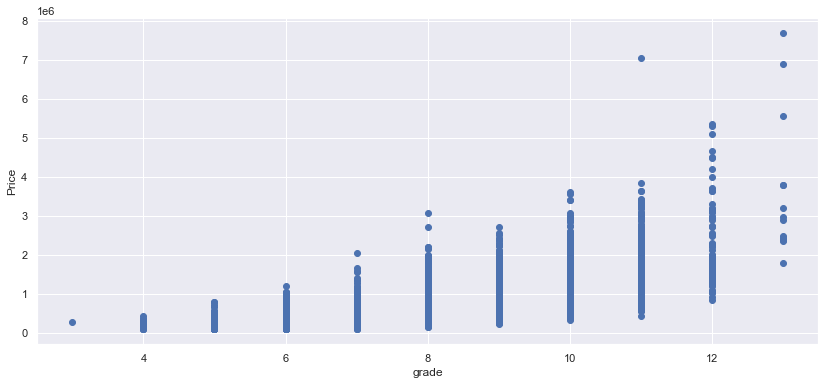

In [76]:
plt.figure(figsize=(14,6))
plt.scatter(data.grade, data.price)
plt.xlabel("grade")
plt.ylabel("Price")
plt.show()

It seems Grade and Price have the strongest linear relationship so far

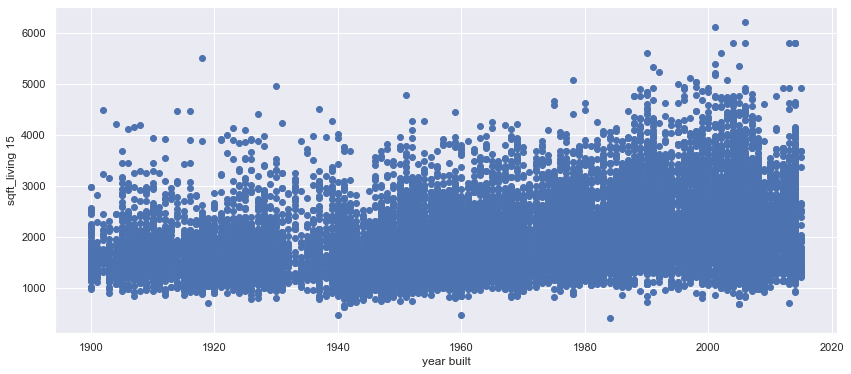

In [77]:
plt.figure(figsize=(14,6))
plt.scatter(data.yr_built, data.sqft_living15)
plt.xlabel("year built")
plt.ylabel("sqft_living 15")
plt.show()

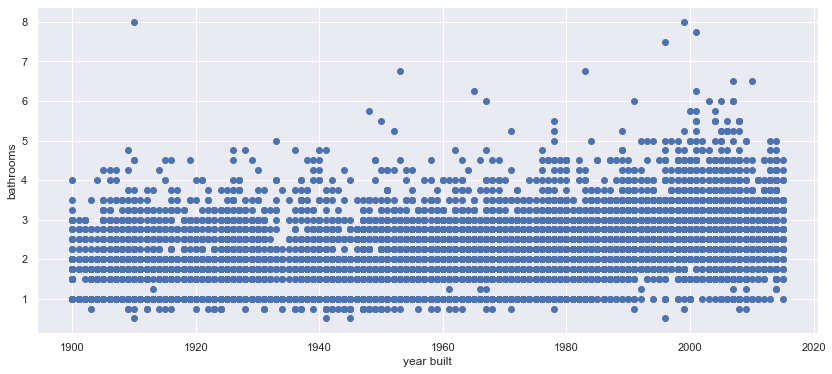

In [78]:
plt.figure(figsize=(14,6))
plt.scatter(data.yr_built, data.bathrooms)
plt.xlabel("year built")
plt.ylabel("bathrooms")
plt.show()

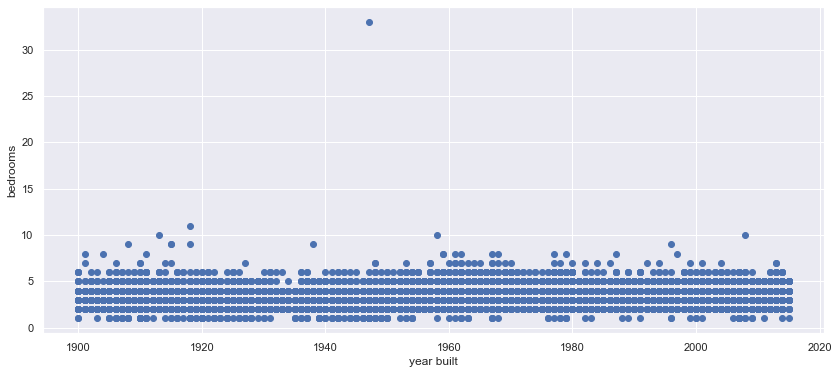

In [79]:
plt.figure(figsize=(14,6))
plt.scatter(data.yr_built, data.bedrooms)
plt.xlabel("year built")
plt.ylabel("bedrooms")
plt.show()

I'm tired of this one house with 33 bedrooms

In [80]:
data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [81]:
df = data.loc[data['bedrooms'] != 33]

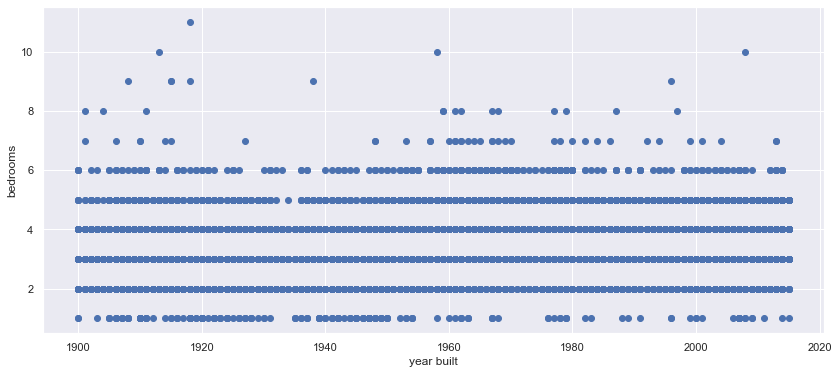

In [82]:
plt.figure(figsize=(14,6))
plt.scatter(df.yr_built, df.bedrooms)
plt.xlabel("year built")
plt.ylabel("bedrooms")
plt.show()

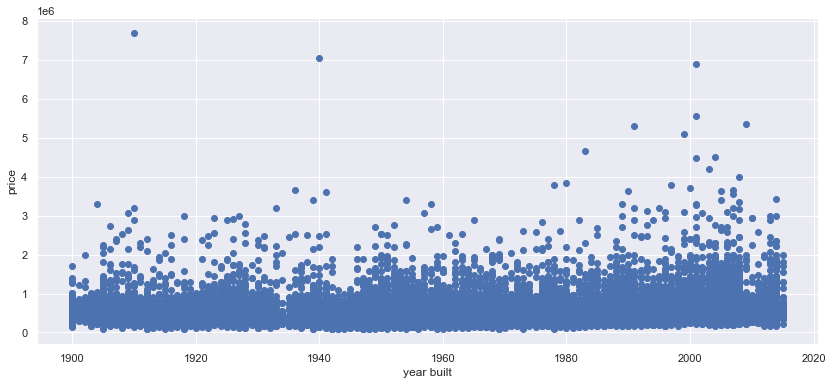

In [83]:
plt.figure(figsize=(14,6))
plt.scatter(data.yr_built, data.price)
plt.xlabel("year built")
plt.ylabel("price")
plt.show()

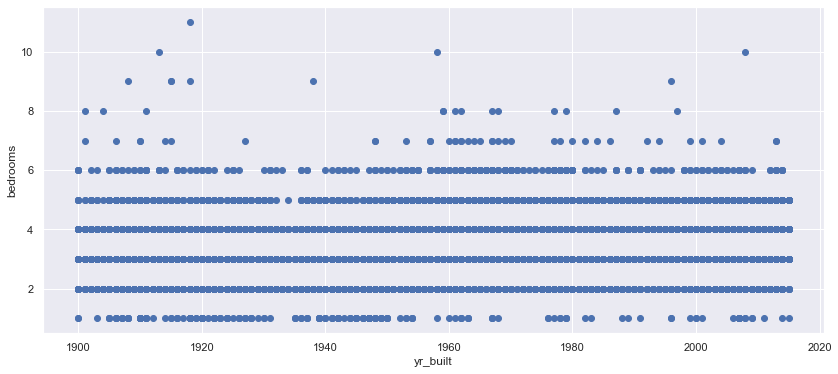

In [84]:
plt.figure(figsize=(14,6))
plt.scatter(df.yr_built, df.bedrooms)
plt.xlabel("yr_built")
plt.ylabel("bedrooms")
plt.show()

Let me see the more expensive zip codes

## Condition and Grade

In [97]:
cond_grade = data[['condition', 'grade']]

In [94]:
data.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

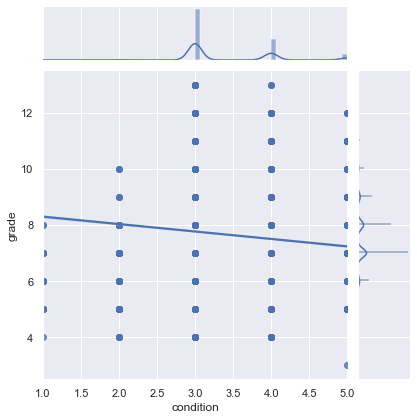

In [96]:
sns.jointplot(x = data.condition,y=data.grade, kind='reg')

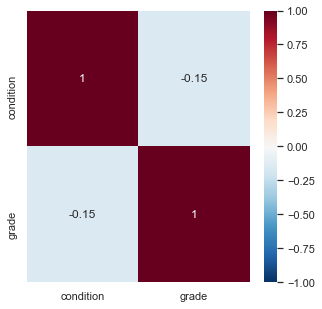

In [100]:
correlation = cond_grade.corr()
plt.figure(figsize=(5,5))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [101]:
data.date.value_counts()

6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/27/2015      1
1/17/2015      1
11/2/2014      1
5/15/2015      1
1/31/2015      1
Name: date, Length: 372, dtype: int64

In [103]:
data.date.min()

'1/10/2015'

In [104]:
data.date.max()

'9/9/2014'